# NaN Boxing Benchmarks

In [1]:
# Librairies
%pip install -q matplotlib numpy pandas scikit-learn
import numpy as np
import re
import subprocess
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
INTERPRETER = "./target/release/som-interpreter-bc"
LIBS = "core-lib/Smalltalk core-lib/Examples/Benchmarks core-lib/Examples/Benchmarks/LanguageFeatures core-lib/Examples/Benchmarks/TestSuite core-lib/Examples/Benchmarks/ValBenchmark"

def exec_bench(name, runs=10):
    runtimes = []
    allocations = []

    for i in range(runs):
        cmd = f"{INTERPRETER} -c {LIBS} . -- BenchmarkHarness {name} 1"
        
        result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
        output = result.stdout

        runtime = re.search(r"runtime: (\d+)us", output)
        allocated = re.search(r"Allocated:    (\d+)bytes", output)
        if runtime:
            runtimes.append(int(runtime.group(1)))
        if allocated:
            allocations.append(int(allocated.group(1)))

        else:
            print("Runtime not found in output:")
            print(output)
    
    return (runtimes, allocations)


In [3]:
def plot_results(name, runtimes, allocations):
    import matplotlib.pyplot as plt

    iterations = list(range(1, len(runtimes) + 1))
    avg_runtime = sum(runtimes) / len(runtimes)
    avg_alloc = sum(allocations) / len(allocations)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

    # Runtime plot (top)
    ax1.plot(iterations, runtimes, marker='o', linestyle='-', color='blue', label='Runtime (μs)')
    ax1.axhline(avg_runtime, color='blue', linestyle='--', label=f'Avg Runtime: {avg_runtime:.1f}μs')
    ax1.set_ylabel('Runtime (μs)')
    ax1.set_title(f'Benchmark: {name}')
    ax1.legend()
    ax1.grid(True)

    # Allocation plot (bottom)
    ax2.bar(iterations, allocations, color='orange', alpha=0.6, label='Allocation (bytes)')
    ax2.axhline(avg_alloc, color='orange', linestyle='--', label=f'Avg Alloc: {avg_alloc:.0f} bytes')
    ax2.set_ylabel('Allocation (bytes)')
    ax2.set_xlabel('Iteration')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


Benchmark: DoubleBench, Runs: 100, Runtimes: [3, 4, 3, 3, 7, 3, 2, 3, 2, 3, 4, 3, 3, 2, 3, 2, 2, 2, 2, 4, 2, 4, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 4, 3, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 3, 2, 2, 2, 4, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 3, 2, 2, 3, 4, 4, 2, 2, 2, 4, 2, 2, 3], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


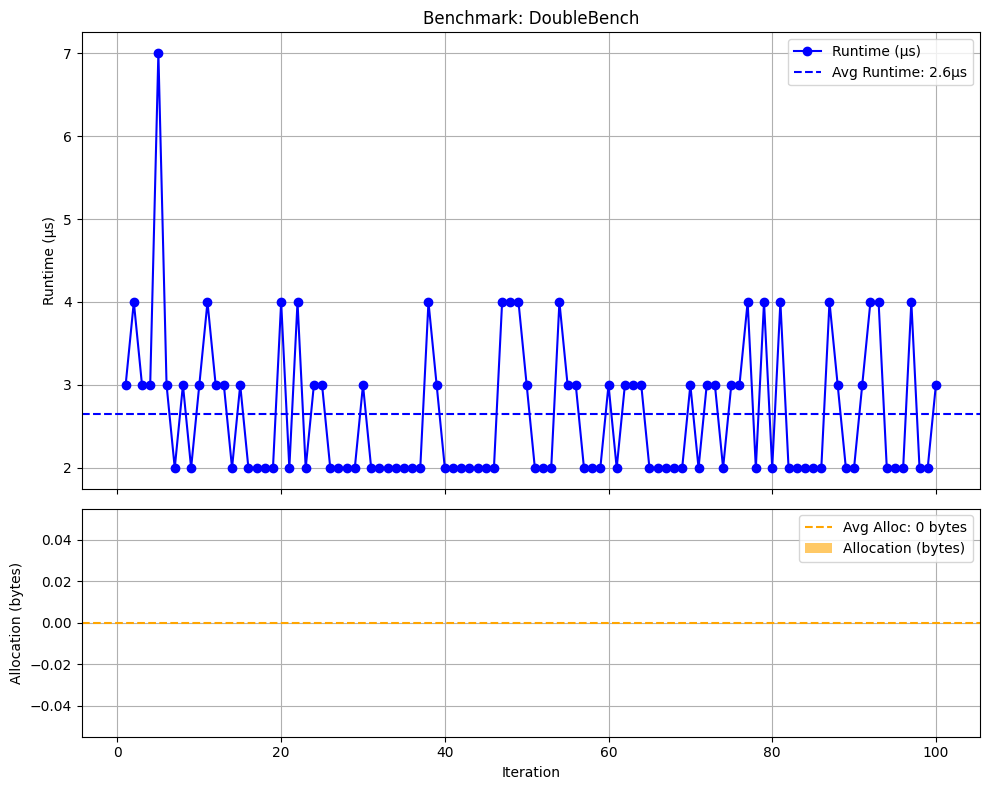

Benchmark: DoubleMedBench, Runs: 100, Runtimes: [7, 7, 5, 8, 6, 27, 5, 6, 6, 9, 7, 6, 6, 5, 5, 5, 6, 6, 7, 7, 6, 6, 6, 6, 6, 8, 6, 5, 6, 6, 6, 5, 8, 6, 5, 6, 5, 5, 8, 7, 6, 6, 5, 5, 5, 9, 5, 6, 8, 5, 6, 5, 5, 6, 16, 6, 7, 6, 5, 6, 6, 5, 8, 6, 8, 5, 6, 6, 5, 6, 6, 7, 8, 6, 6, 6, 6, 6, 5, 8, 6, 6, 5, 7, 5, 6, 6, 8, 8, 7, 6, 6, 6, 8, 6, 5, 5, 8, 8, 7], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


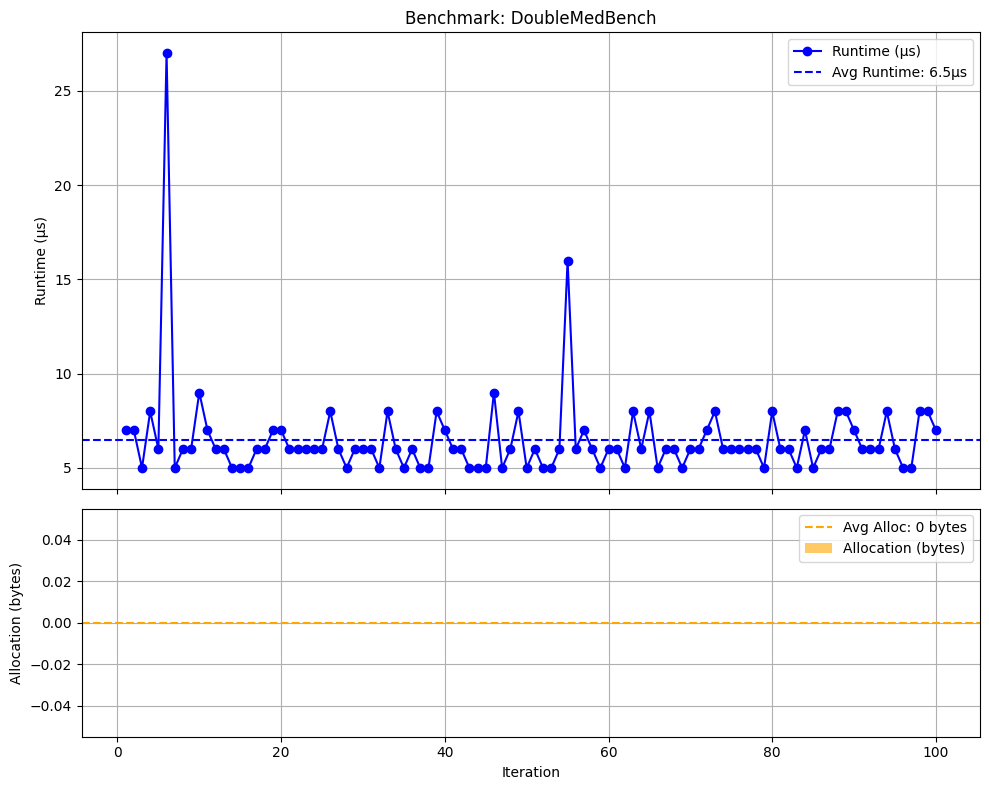

Benchmark: DoubleHighBench, Runs: 100, Runtimes: [10204, 9197, 9121, 9235, 9430, 9376, 9389, 9555, 9367, 9163, 9380, 9380, 9508, 9015, 9205, 9172, 9178, 9188, 9296, 9286, 9277, 9347, 9159, 9158, 9051, 9174, 9194, 9170, 9128, 9090, 9167, 9236, 9118, 9089, 9132, 9145, 9126, 9039, 9207, 9149, 9214, 9243, 9317, 9275, 9394, 9375, 9415, 9301, 9409, 9336, 9206, 9516, 9198, 9172, 9211, 9167, 9210, 9109, 9267, 9051, 9166, 9257, 9261, 9137, 9497, 9513, 9685, 9479, 10531, 14899, 9566, 9422, 9328, 9288, 9302, 9240, 9292, 9271, 9365, 9337, 9238, 9834, 10260, 10147, 9355, 9360, 9315, 9309, 9250, 9219, 9268, 9148, 9208, 9285, 9300, 9272, 9172, 9146, 9201, 9052], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


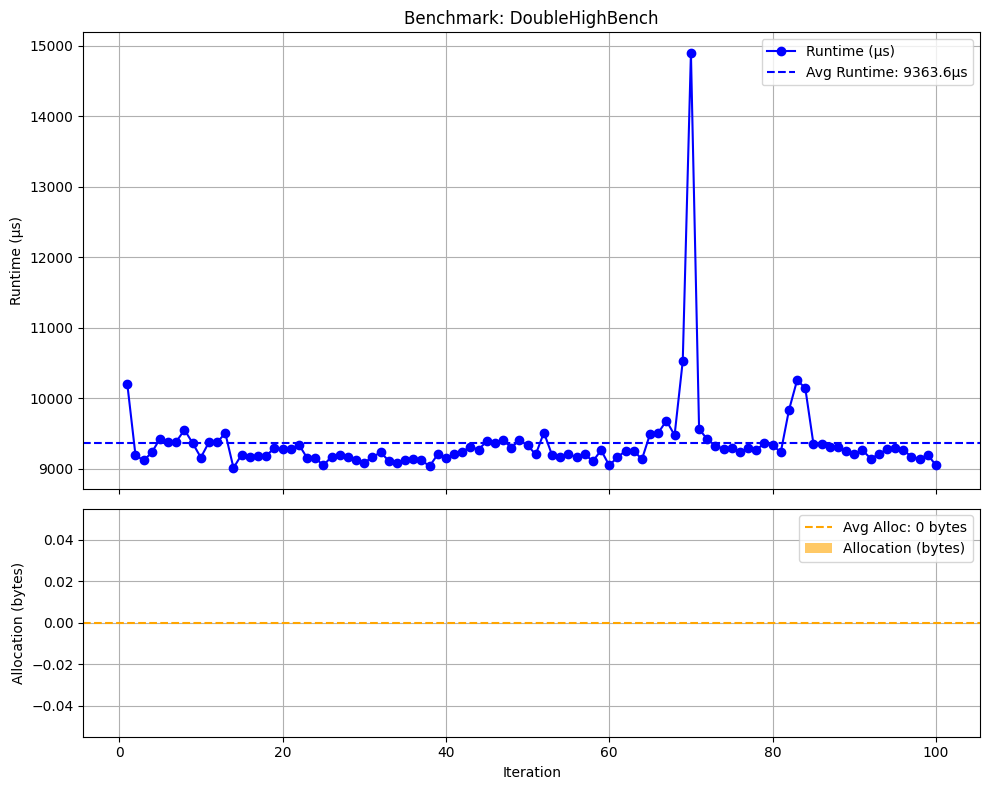

Benchmark: DoubleSqrtBench, Runs: 100, Runtimes: [1080, 1058, 1112, 1100, 1067, 1063, 1058, 1063, 1053, 1058, 1045, 1045, 1106, 1058, 1051, 1048, 1120, 1084, 1053, 1073, 1068, 1070, 1033, 1082, 1065, 1321, 1076, 1265, 1057, 1095, 1059, 1035, 1081, 1039, 1178, 1067, 1048, 1047, 1055, 1113, 1028, 1072, 1043, 1220, 1073, 1040, 1064, 1028, 1043, 1050, 1059, 1070, 1167, 1071, 1033, 1057, 1047, 1129, 1194, 1119, 1098, 1080, 1039, 1048, 1072, 1038, 1129, 1056, 1068, 1099, 1065, 1039, 1059, 1043, 1062, 1078, 1073, 1076, 1097, 1076, 1084, 1093, 1089, 1055, 1089, 1077, 1061, 1079, 1027, 1032, 1041, 1061, 1064, 1047, 1099, 1043, 1160, 1055, 1032, 1031], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


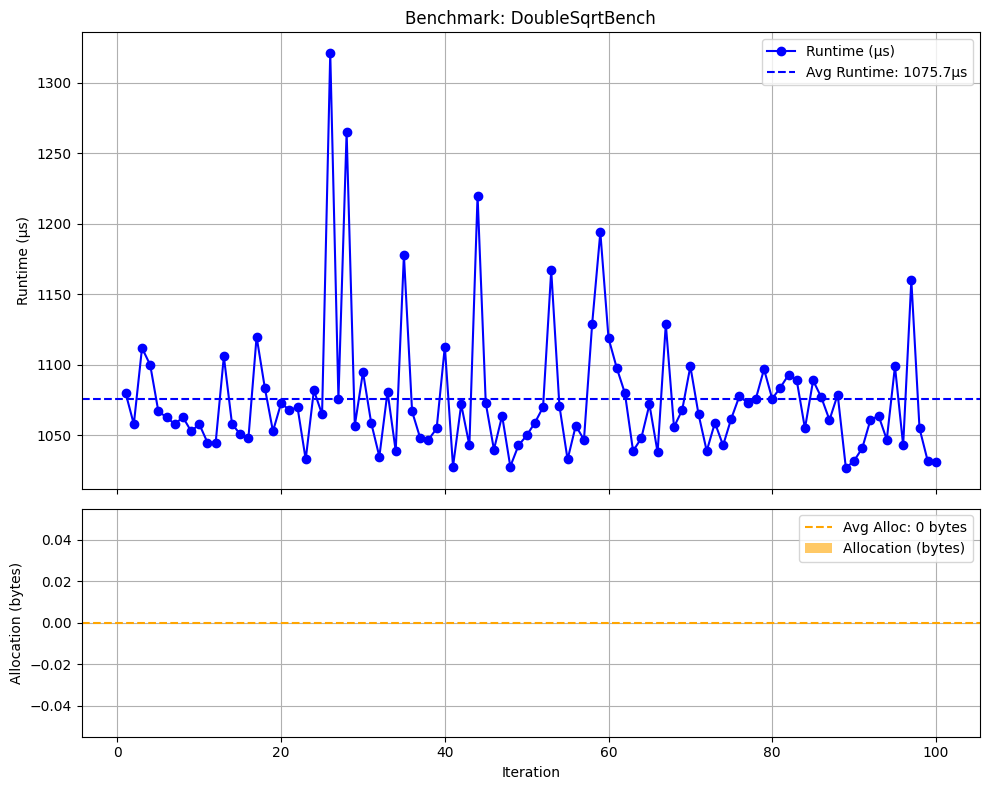

Benchmark: DoubleLExpBench, Runs: 100, Runtimes: [34, 25, 30, 26, 36, 31, 29, 31, 24, 30, 28, 30, 26, 27, 38, 25, 30, 30, 27, 27, 25, 24, 24, 25, 30, 24, 29, 24, 24, 44, 25, 26, 24, 24, 28, 26, 24, 30, 30, 37, 25, 24, 24, 31, 30, 25, 32, 24, 24, 24, 29, 30, 27, 25, 24, 27, 30, 31, 30, 32, 29, 32, 35, 25, 24, 29, 24, 26, 24, 29, 27, 25, 31, 24, 39, 28, 24, 24, 34, 26, 32, 25, 25, 24, 25, 24, 29, 28, 27, 29, 24, 27, 25, 26, 31, 24, 26, 28, 39, 25], Allocations: [32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 327

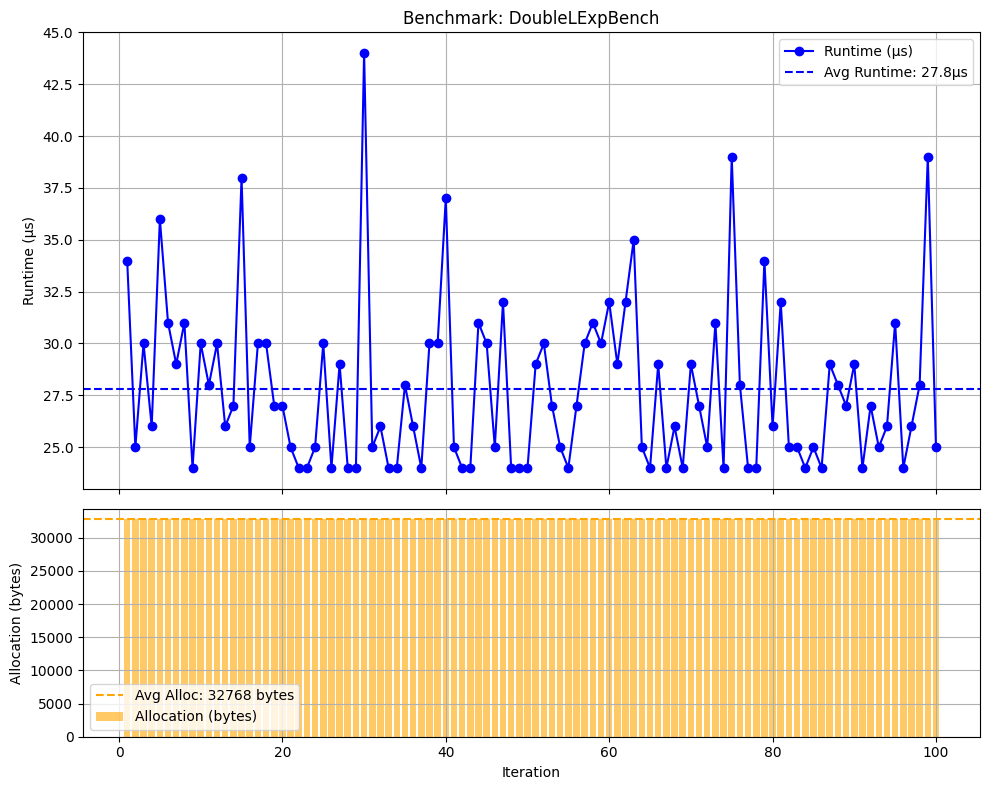

Benchmark: IntegerBench, Runs: 100, Runtimes: [3, 4, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 4, 3, 4, 3, 4, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


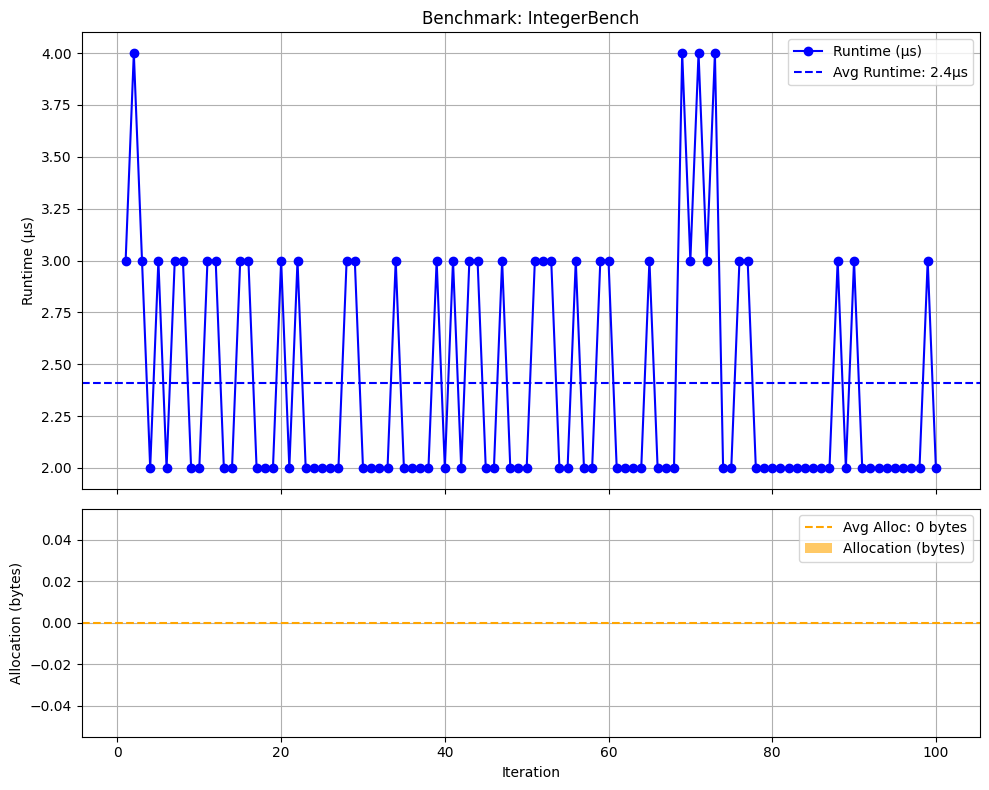

Benchmark: IntegerMedBench, Runs: 100, Runtimes: [27, 11, 11, 13, 10, 10, 11, 13, 10, 13, 11, 11, 12, 13, 12, 12, 14, 12, 11, 10, 10, 10, 10, 10, 11, 10, 11, 10, 10, 10, 9, 10, 10, 10, 14, 9, 9, 10, 10, 9, 9, 10, 18, 14, 10, 14, 10, 14, 12, 10, 9, 10, 10, 15, 14, 10, 9, 13, 14, 13, 13, 9, 13, 9, 9, 13, 13, 12, 9, 9, 8, 9, 15, 13, 13, 9, 9, 9, 15, 9, 9, 9, 9, 9, 9, 9, 14, 13, 9, 9, 9, 9, 9, 14, 13, 13, 9, 9, 10, 13], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


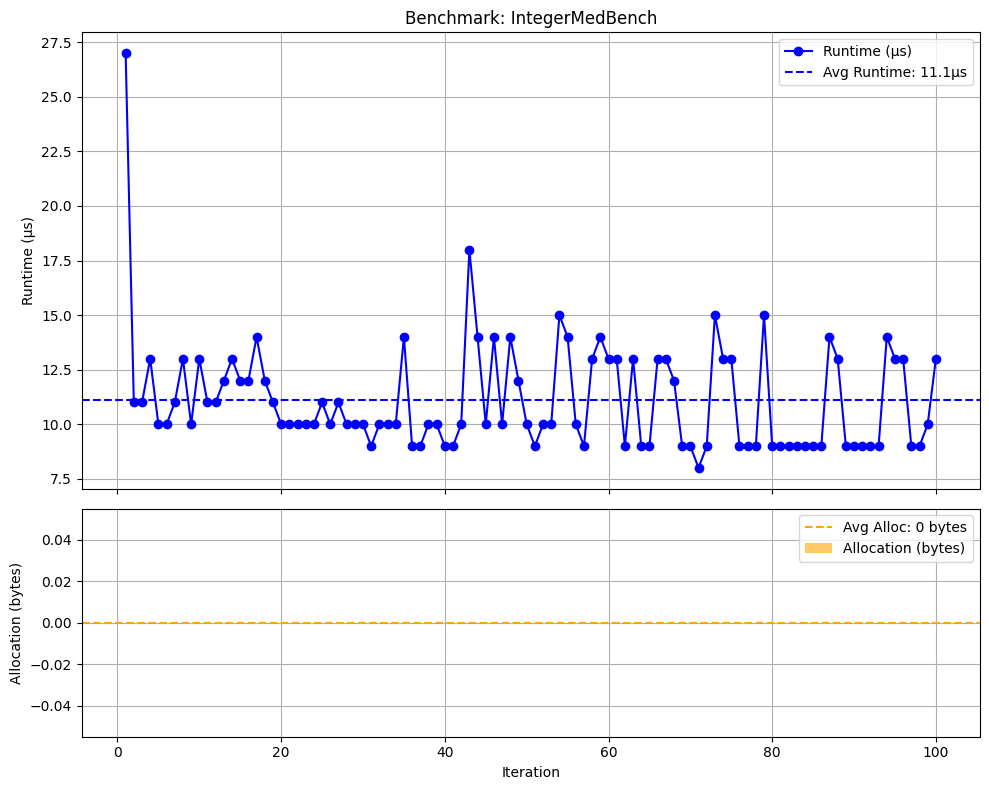

Benchmark: IntegerHighBench, Runs: 100, Runtimes: [70, 70, 67, 70, 63, 76, 63, 76, 70, 64, 73, 67, 64, 68, 64, 65, 74, 67, 79, 65, 67, 67, 64, 64, 66, 66, 72, 63, 67, 71, 67, 66, 65, 67, 67, 69, 66, 70, 82, 77, 67, 80, 64, 76, 64, 67, 74, 74, 67, 67, 79, 71, 63, 67, 69, 69, 63, 77, 66, 67, 63, 66, 67, 69, 68, 70, 63, 63, 66, 72, 73, 66, 78, 66, 78, 66, 69, 72, 63, 63, 67, 80, 66, 71, 67, 73, 68, 67, 67, 67, 72, 72, 72, 63, 72, 67, 71, 66, 68, 63], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


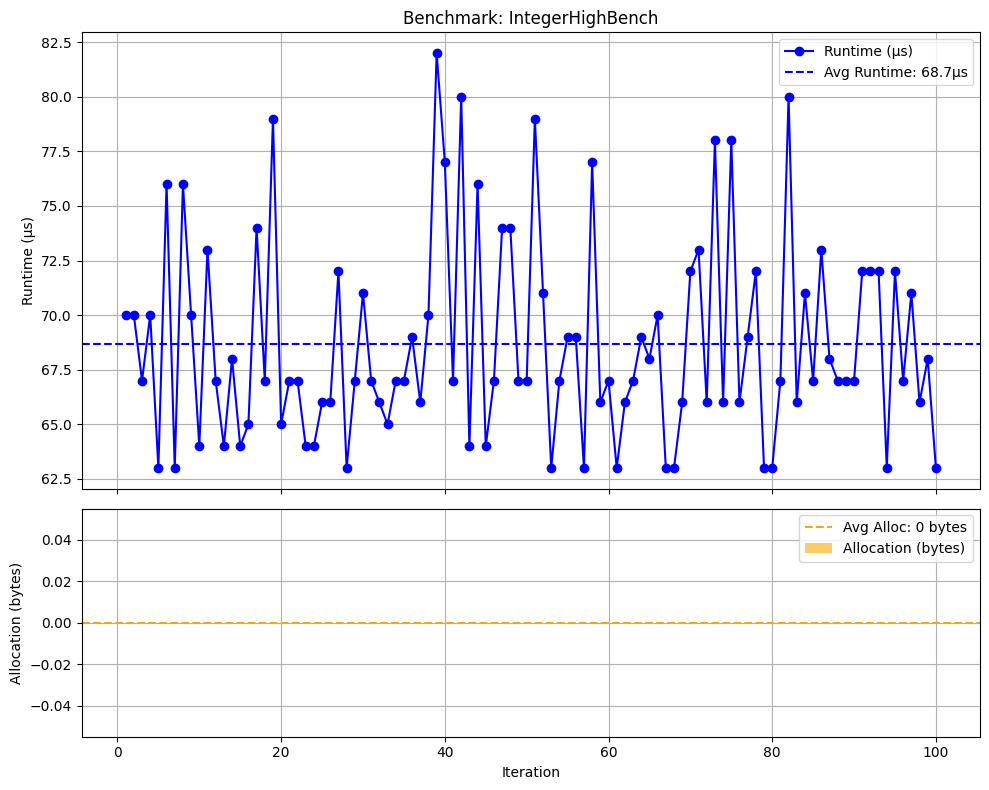

Benchmark: IntegerExpBench, Runs: 100, Runtimes: [53, 50, 41, 41, 44, 47, 45, 49, 40, 41, 53, 48, 52, 51, 47, 41, 52, 48, 46, 46, 45, 42, 46, 46, 50, 42, 40, 46, 47, 46, 48, 42, 45, 45, 44, 48, 41, 43, 47, 42, 45, 40, 40, 41, 41, 42, 45, 44, 41, 43, 41, 41, 50, 43, 40, 46, 49, 47, 78, 54, 44, 44, 45, 44, 41, 40, 41, 45, 48, 49, 42, 42, 42, 44, 52, 44, 47, 44, 48, 51, 41, 42, 40, 42, 50, 42, 52, 44, 41, 47, 52, 55, 51, 46, 40, 50, 44, 44, 48, 46], Allocations: [69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 696

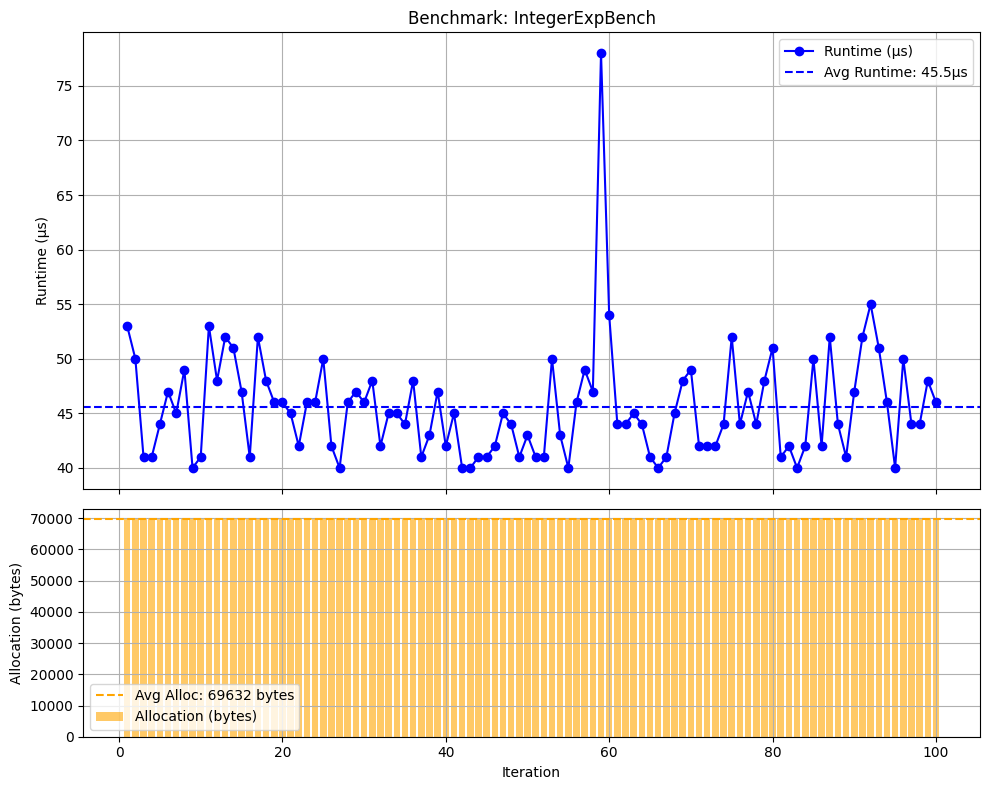

Benchmark: IntegerBigBench, Runs: 100, Runtimes: [572, 452, 470, 530, 473, 478, 466, 487, 465, 512, 494, 474, 460, 471, 525, 489, 454, 454, 452, 489, 526, 460, 537, 472, 461, 470, 475, 486, 512, 468, 469, 461, 465, 2636, 468, 483, 468, 485, 437, 488, 480, 461, 445, 479, 498, 465, 475, 439, 511, 494, 495, 483, 504, 456, 484, 465, 490, 477, 476, 457, 537, 451, 469, 494, 487, 490, 471, 465, 502, 498, 505, 471, 483, 459, 448, 479, 492, 492, 497, 471, 470, 457, 498, 473, 492, 462, 492, 479, 474, 485, 477, 487, 523, 479, 496, 478, 471, 442, 462, 477], Allocations: [475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 47

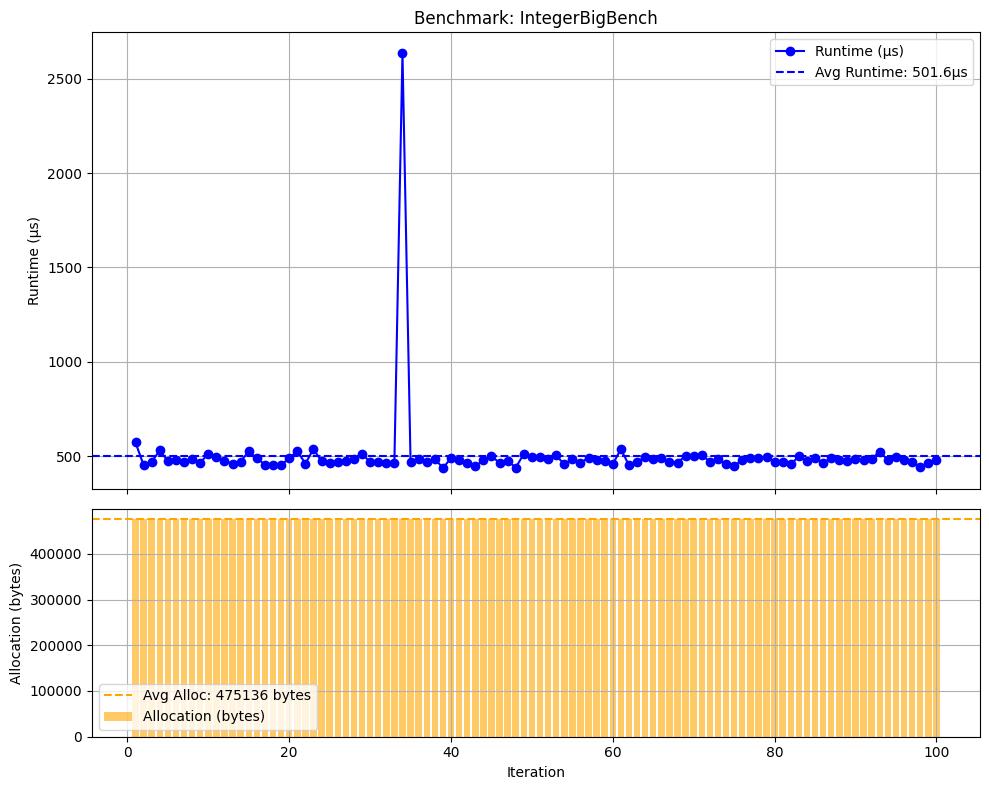

In [4]:
# General Configuration
BENCHMARKS = [
    "DoubleBench",
    "DoubleMedBench",
    "DoubleHighBench",
    "DoubleSqrtBench",
    "DoubleLExpBench",
    "IntegerBench",
    "IntegerMedBench",
    "IntegerHighBench",
    "IntegerExpBench",
    "IntegerBigBench"
]

runs = 100

for benchmark in BENCHMARKS:
    outcome = exec_bench(benchmark, runs)
    print(f"Benchmark: {benchmark}, Runs: {runs}, Runtimes: {outcome[0]}, Allocations: {outcome[1]}")
    plot_results(benchmark, outcome[0], outcome[1])